![Title picture](./images/title_ENG.png)
<br>
<br>
**Discord:** `#co26-a-practical-intro-to-probability-theory`

# Topic 1: A Model for Random Events.

- Classical definition of probabilities; frequencies.
- Experiments with dice.
- Experiments with ~crocodiles~ black and while balls.
- A math model for random events: Probability space. Outcomes, events. Notes on Set theory.
- A couple of numerical illustrations for random events.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np  # a powerful lib for computations
from time import time  # measuring time
from tqdm.notebook import tqdm  # that's a progress-bar
# ... and these are to draw figures:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# A technical auxiliary code: so that our coin toss looks fancy
# (Not critical to understand most of the material.)

class dice:
    """Describes a dice."""
    def __init__(self):
        self.Omega = [face for face in '⚀⚁⚂⚃⚄⚅']

    def roll(self):
        """Throws the dice -- returns a facet (unif. random)."""
        return np.random.choice(self.Omega)


class coin:
    """Describes a coin toss."""
    def __init__(self):
        self.Omega = ["H", "T"]

    def toss(self):
        """Tosses the coin -- returns ``H`` (HEAD) or `T` (TAIL), unif. random."""
        return np.random.choice(self.Omega)

## A "fair" coin
- here's an experiment with two possible outcomes, **H**EADs or **T**AILs.

In [3]:
c = coin()
s = ''

In [19]:
s += c.toss()
s

'TTHTTHHHHHTTHTHH'

In [20]:
def toss_a_coin(NO_BATCHES=10, BATCH_SIZE=10):
    """Models the experiment: tossing a fair coin.
    
    Tosses the coin ``BATCH_SIZE`` times,
    repeats for ``NO_BATCHES`` times.
    
    Returns:
        ``heads_freq`` (list): each element = cumulative share
        of HEADs given all the previous experiments up to the given batch.
    """
    no_heads = 0
    heads_freq = []

    c = coin()
    for i in range(NO_BATCHES):
        for j in range(BATCH_SIZE):
            if c.toss() == "H":
                no_heads += 1
        heads_freq.append(no_heads / ((i+1)*BATCH_SIZE))
    
    return heads_freq

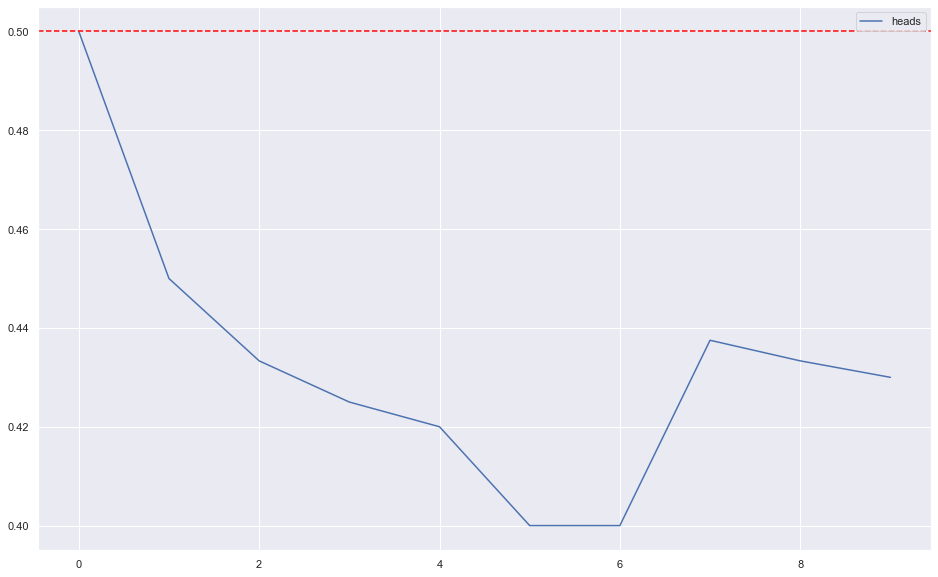

In [21]:
# horizontal axis = batch number,
# vertical axis = cumulative share of HEADs.
plt.figure(figsize=(16,10))
heads_freq = toss_a_coin()
fig = sns.lineplot(x=[i for i in range(len(heads_freq))], y=heads_freq, label="heads")
fig.axhline(0.500, color='red', ls='--')

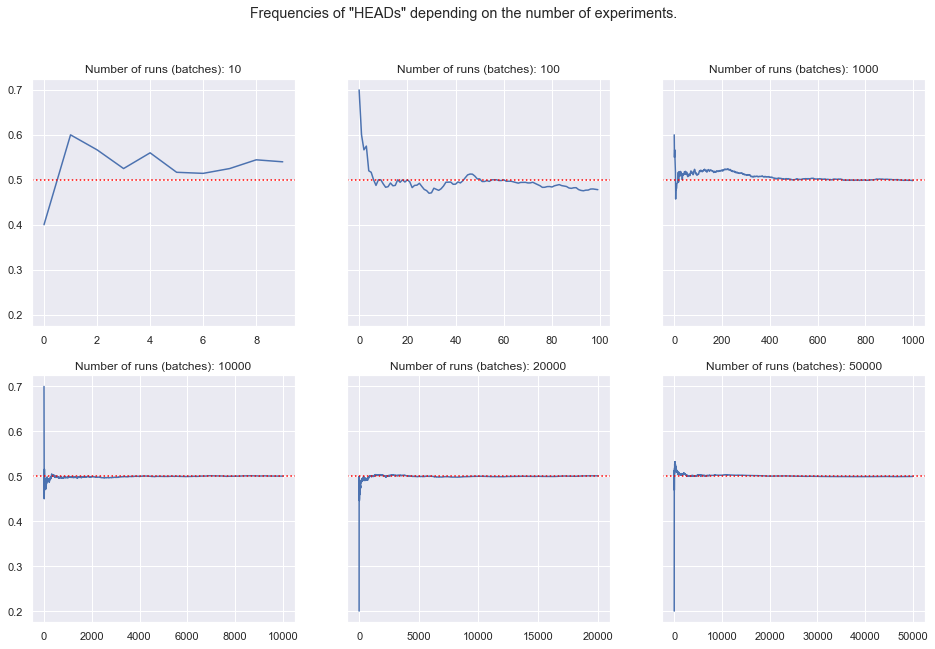

In [22]:
# The same experiment, repeated for several lengths (numbers of batches)
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(16,10)); ax = ax.flatten()
fig.suptitle('Frequencies of "HEADs" depending on the number of experiments.')

for k, NB in enumerate([10, 100, 1000, 10000, 20000, 50000]):
    ax[k].set_title(f"Number of runs (batches): {NB}")
    heads_freq = toss_a_coin(NO_BATCHES=NB)
    
    sns.lineplot(x=[i for i in range(len(heads_freq))], y=heads_freq, ax=ax[k])
    ax[k].axhline(0.500, color='red', ls='dotted')

In [23]:
print(f'"Long-term share" of HEADS (over {len(heads_freq)*10:,} trials): {heads_freq[-1]:.4f}')

"Long-term share" of HEADS (over 500,000 trials): 0.4998


## *A question:* so, how to describe random events?

1. Describe all the possible outcomes.
2. Specify "long-term frequency" for each outcome.

Like:
- $\Omega=\{H,T\}$ -- possible outcomes.
- $p_H=p_T=1/2$

*Do we need anything else in the model?*

Let's consider a slightly more complicated example: dice.

<img src="./images/dice.png" width=100 heigth=100> 

In [24]:
d = dice()
s=''

In [33]:
s += d.roll()
s

'⚀⚁⚀⚀⚁⚅⚂⚄⚂'

In [34]:
def roll_a_die(NO_BATCHES=10, BATCH_SIZE=60):
    """Models the experiment: throws a dice.
    
    For each experiment, throws the dice ``BATCH_SIZE`` times.
    Repeats the experiment ``NO_BATCHES`` times.
    
    Returns:
        ``freqs`` (list):  each element = cumulative share
        (i.e., share) of each result, given all the previous experiments
        up to the given batch.
    
    Note:
        For example, ``freqs[t]`` will contain 6 frequencies, cumulative
        up to (including) the experiment number ``t``.
    """ 
    c = dice()
    
    numbers = dict(zip(c.Omega, [0]*6))
    freqs = [0.0] * NO_BATCHES
    
    for i in range(NO_BATCHES):
        for j in range(BATCH_SIZE):
            numbers[c.roll()] += 1
            
        freqs[i] = [numbers[X] / ((i+1)*BATCH_SIZE) for X in numbers.keys()]
    
    return freqs

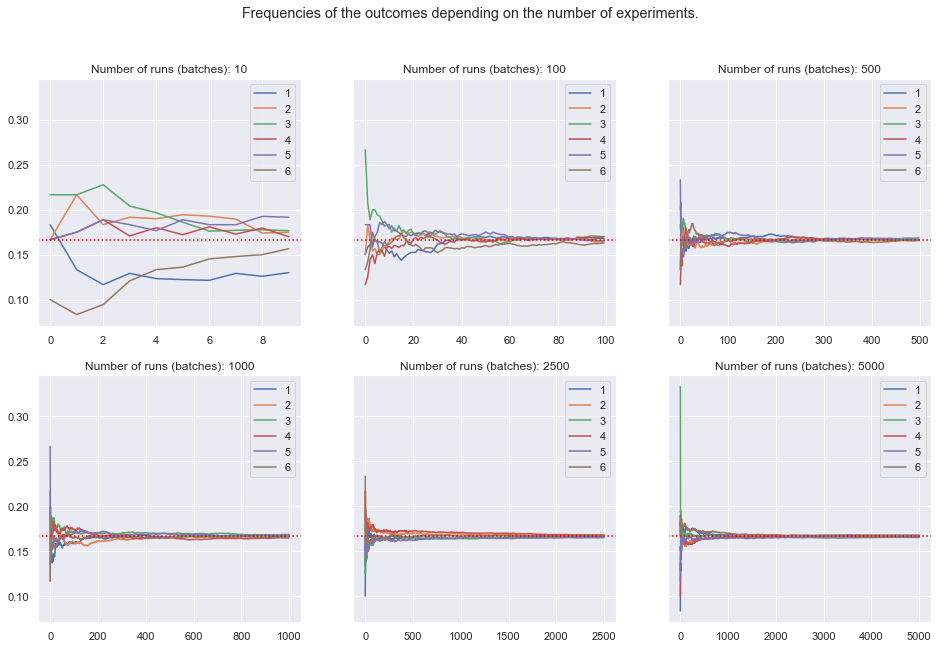

In [35]:
# So, a figure similar to the ones above, but now for the dice:
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(16,10)); ax = ax.flatten()
fig.suptitle('Frequencies of the outcomes depending on the number of experiments.')

for k, NB in enumerate([10, 100, 500, 1000, 2500, 5000]):
    ax[k].set_title(f"Number of runs (batches): {NB}")
    freqs = roll_a_die(NO_BATCHES=NB)
    
    for i in range(6):
        sns.lineplot(x=[j for j in range(NB)],
                     y=[freqs[b][i] for b in range(NB)],
                     ax=ax[k], label=f"{i+1}")
    ax[k].axhline(0.16667, color='red', ls='dotted')

In [36]:
print(f'"Long-term share" of outcomes (over {len(freqs)*60:,} trials): \n{freqs[-1]}')

"Long-term share" of outcomes (over 300,000 trials): 
[0.16777666666666666, 0.16764666666666667, 0.16635666666666668, 0.16672, 0.16525333333333334, 0.16624666666666665]


## Let's test our "model".
- $\Omega=$ {⚀, ⚁, ⚂, ⚃, ⚄, ⚅} -- possible outcomes.
- $p_⚀=\ldots=p_⚅=1/6$
- Let's think about probability as about these "long-term frequencies".

**Questions for discussion:**

- what is the probability of "⚄"? why?
- Assume I am playing a game. Let's find the probability of winning, assuming I am winning only if:
  + ... I get a score of 4 or more.
  + ... only if the score is even.
  + ... only if even, or anything above `4`? 

(**hint:** it seems we need a quick fix into the model.)

## How to organize the mathematical model then?

Actually, we need three components:
- all the possible *outcomes*. $\Omega=$ {⚀, ⚁, ⚂, ⚃, ⚄, ⚅} -- obviously...  (*Some non-empty set.*)
- all the possible *events*. $\mathcal{F}$ -- say, all possible subsets of $\Omega$. 
  + I don't really need to *enumerate* all of these explicitly. But I'd need to understand that the probabilities will be attributed to them, not "just" to outcomes.
  + Generally speaking, this is some collection of subsets of $\Omega$. *(Which one?)*
- a function of "probability" $\mathbb{P}: \mathcal{F} \rightarrow [0,1]$, such that... *that what?*


## Sidenote: "set theory" -- a 5 minute crash course. (non-rigorous)

- *a set* -- is, well... a handful of something. Roughly speaking, this is a list of something*, where we do not care about the order of elements, but they do not repeat:
  + `{1,2,3}`, `{A,B,C}`, `{X, 42, "Alexey", letter Ѯ, MiT}` -- all these are sets. `{a,b,b,c}` -- is not (*why?*).
  
  ---
[*] almost. Caveat: can a set include itself as an element? A famous problem: a barber lives in a village. Now, assume he shaves everyone who does not do it himself, and only them. A question, though: does he shave himself? See Russell's paradox.

- the set of all (relevant) outcomes is denoted $\Omega$, nothing -- $\varnothing$ ("empty set").
- if outcome `x` does (not)belong to event `A`, we write: $x \in A$ (respectively, $x\notin A$)
- we can perform more or less obvious operations over the sets, and define relations. For example:
<center>
<img src="./images/sets.png" width="800" height="400">

## OK, so. Back to probabilities.

1. $\mathbb{P}(\varnothing)=0$
2. $\mathbb{P}(\Omega)=1$
3. if events $A$ and $B$ do not share elements, then $\mathbb{P}(A\cup B) = \mathbb{P}(A)+\mathbb{P}(B)$

One can think about this function as about "weight" of the subset of $\Omega$ (people actually use word *measure*).

- *Question to think about:* what would be the probability of event $A\cup B$, if $A\cap B \neq \varnothing$? Can we tell from what we already know?

## Classical definition for "equally probable" outcomes.
If (for some reason) we know upfront that the outcomes "must happen equally frequently", it seems logical to introduce the probability as a share of relevant outcomes. Let's see:
- $\mathbb{P}(A)=$ `<number of outcomes in A>` / `<number of outcomes in Ω>`
- seems to work for our examples with the "fair coin" and dice.
- we can come up with more examples:

**A problem.** Assume I have a  ~bag with balls of different colors~ magic hat, so that I can pick a rabbit out of it. However, the supplier turned out to be unreliable. Due to COVID-related shortages, the fifth dimension inside the hat is apparently broken, and contains not only 🐇🐇🐇🐇🐇🐇🐇🐇🐇🐇 (10), but also 🐊🐊🐊🐊🐊  (5).

**Questions:** 
**(1)** how often (on the average) my performance will go wrong?..

- well, yeah, 5/15 ~ 33%

🐇🐇🐇🐇🐇🐇🐇🐇🐇🐇 (10) vs. 🐊🐊🐊🐊🐊  (5).

**(2)**. Assume during a performance I must pick a rabbit out of the hat five times. What's the probability that these will indeed be rabbits?

 **2а)** assuming whatever I picked out of the hat, I am putting it back every time.

Okay, $\Omega=$ all the combinations of 🐇 and 🐊, five slots. The probability $\mathbb{P}(🐇🐇🐇🐇🐇)=1 / 2^5$, about 3%. Right?

Would this work?..

In [37]:
hat = ["🐇"]*10 + ["🐊"]*5
hat

['🐇', '🐇', '🐇', '🐇', '🐇', '🐇', '🐇', '🐇', '🐇', '🐇', '🐊', '🐊', '🐊', '🐊', '🐊']

In [38]:
success = 0
N = 500000

for i in range(N):
    if np.array_equal(np.random.choice(hat, 5, replace=True), 
                      ["🐇"] * 5):
        success += 1
        
print(f"Share of successes (estimated): {100 * success / N:.2f}")

Share of successes (estimated): 13.25


?!..

- Oh, wait, these are *not* equally probable!
- So, actually $\Omega=$ all the combinations of 🐇 and 🐊... (five slots, **names** of the animals). How many options to pick out a specific set of animals?

$15\cdot15\cdot15\cdot15\cdot15=15^5=759,375$

- How many of those are "desirable" (i.e., only rabbits)?

$10^{5}=100,000$. So, we end up with the probability:

In [62]:
print(f"{(10**5 / (15**5))*100:.2f}%")

13.17%


... 🌠 magic!🌠

**2b)** Ok, how would the answer change if I wouldn't put the animals back every time?.. 

*(a problem to think about...)*

**One more problem.** The night before the lecture, I am generating random English letters (non-repeating), three at a time. What's the probability to get `BIO`?

Let's see: in total, this is ...

In [39]:
letters = [l for l in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"]
print(f"...{len(letters)} letters")

...26 letters


So, then the frequency of this particular combination must be one over $26\cdot 25 \cdot 24 = $ one over...

In [40]:
26*25*24

15600

In [51]:
"".join(np.random.choice(letters, 3, replace=False))

'NGA'

  0%|          | 0/500000 [00:00<?, ?it/s]

Calculation finished in 39.7 sec., 34 successful events found.


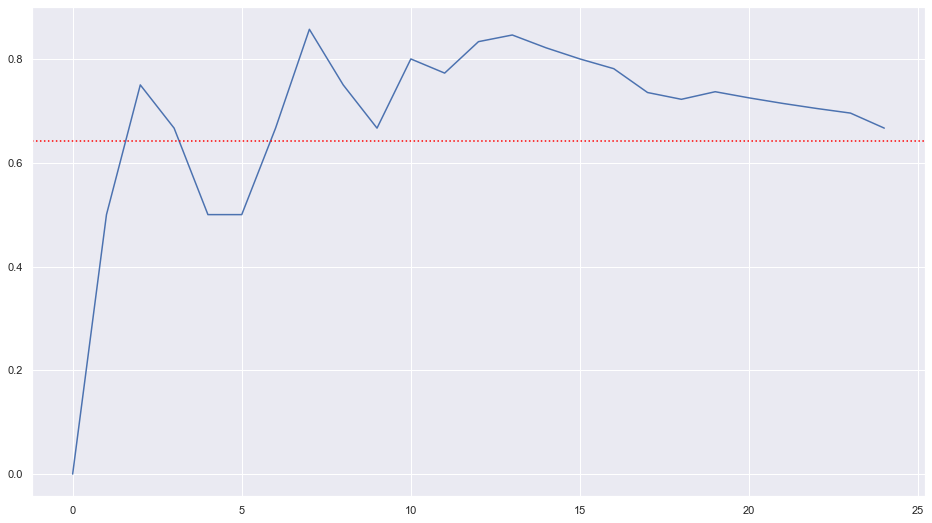

In [52]:
success = 0
freqs = []
t0 = time()
for i in tqdm(range(500000)):
    if "".join(np.random.choice(letters, 3, replace=False)) == "BIO":
        success += 1
    
    if i % 20000 == 0:
        freqs.append(success*1e4 / (i+1))

t1 = time()
print(f"Calculation finished in {t1-t0:.1f} sec., {success} successful events found.")

fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x=[x for x in range(len(freqs))], y=freqs)
ax.axhline(10000/(26*25*24), color='red', ls='dotted')


## One more example: a sci-fi text.
Even simple models with equally probable outcomes can be surprisingly useful (especially as a component in some more complex mathematical "beast"). Let's see:

In [53]:
with open("./scifi.txt", "r") as file:
    text = file.read()

In [54]:
text = text.lower()
text[:800]

"\ufeffchapter 1\n\nmy uncle makes a great discovery\n\n\nlooking back to all that has occurred to me since that eventful day, i\nam scarcely able to believe in the reality of my adventures. they were\ntruly so wonderful that even now i am bewildered when i think of them.\n\nmy uncle was a german, having married my mother's sister, an\nenglishwoman. being very much attached to his fatherless nephew, he\ninvited me to study under him in his home in the fatherland. this home\nwas in a large town, and my uncle a professor of philosophy, chemistry,\ngeology, mineralogy, and many other ologies.\n\none day, after passing some hours in the laboratory--my uncle being\nabsent at the time--i suddenly felt the necessity of renovating the\ntissues--<i>i.e.</i>, i was hungry, and was about to rouse up our old french\ncook, wh"

In [55]:
# freqs = dict()
e_freq = []
t_freq = []
a_freq = []
freqs = dict()

for i, c in enumerate(text):
    if c not in freqs.keys():
        freqs[c] = 1
    else:
        freqs[c] += 1
        
    if i % 1000 == 0 and 'e' in freqs.keys():
        e_freq.append(freqs['e'] / i)
        t_freq.append(freqs['t'] / i)
        a_freq.append(freqs['a'] / i)
        
e_freq.append(freqs['e'] / i)
t_freq.append(freqs['t'] / i)
a_freq.append(freqs['a'] / i)

freqs = {c: num/i for c,num in freqs.items() }
print(f"Processed {i} symbols.")

Processed 503560 symbols.


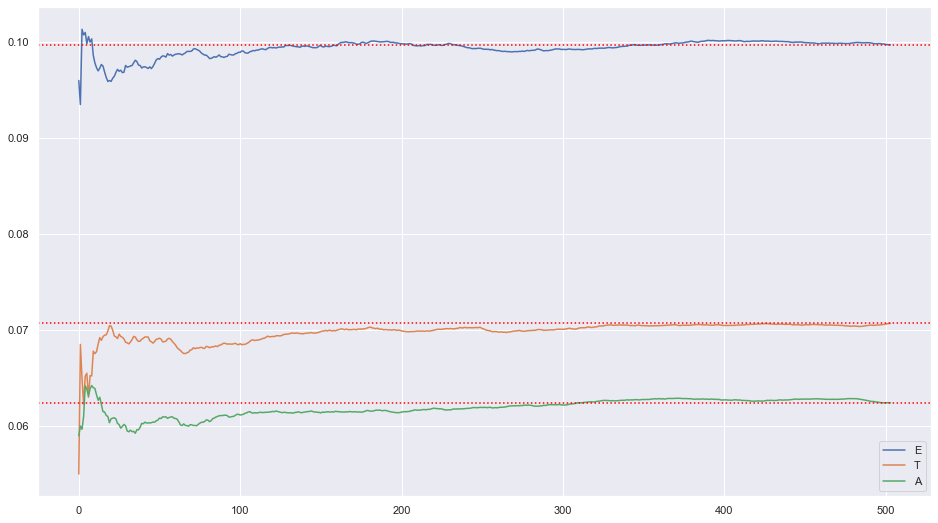

In [56]:
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x=[x for x in range(len(e_freq))], y=e_freq, label="E")
sns.lineplot(x=[x for x in range(len(t_freq))], y=t_freq, label="T")
sns.lineplot(x=[x for x in range(len(a_freq))], y=a_freq, label="A")

ax.axhline(e_freq[-1], color='red', ls='dotted')
ax.axhline(t_freq[-1], color='red', ls='dotted')
ax.axhline(a_freq[-1], color='red', ls='dotted')

In [57]:
sorted(freqs.items(), key=lambda x: x[1], reverse=True)[:10]

[(' ', 0.15981015171975535),
 ('e', 0.0997140360632298),
 ('t', 0.07068869648105489),
 ('a', 0.0624215585034554),
 ('o', 0.06051116053697673),
 ('i', 0.053089999205655734),
 ('n', 0.05268488362856462),
 ('s', 0.048395424577011674),
 ('r', 0.04699737866391294),
 ('h', 0.0434248153149575)]

(compare to ["Letter frequencies"](https://en.wikipedia.org/wiki/Letter_frequency) in Wiki. But that's a different story; see also [Coding theory](https://en.wikipedia.org/wiki/Coding_theory) and ["Cryptography"](https://en.wikipedia.org/wiki/Cryptography)...). 

So,
- Probability Space: $(\Omega, \mathcal{F}, \mathbb{P})$.
- Interpretation of probability as a "long-term frequency". (Not the only one!)
- Several examples: coin, dice, sci-fi text.

## Any questions at this point?

## Next time:
   - Crocodiles and rabbits revised (aka black and white balls).
   - Dependent and Independent events.
   - Conditional probability.
   - COVID test as a random variable. Characterizing tests.

## Thinking with 🍵
- connect via Discord (who're you? Programming and probs background? Any special interests in the topic?)
- given the properties of probability, $\mathbb{P}$, how would you find (a formula for) $\mathbb{P}(A\cup B)$ for the case when $A\cap B \neq \varnothing$?
- Assume the hat still contains 10 🐇 and 5 🐊. Assume I am picking the animals out one by one, but now they run away every time. How would you assess the probability to pick out five rabbits (in a row)? 
- **optional:** install FreePlane (or anything you like to summarize things, really.)

**DISCORD SMTB:** `#co26-a-practical-intro-to-probability-theory`